In [27]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


# Load data sets dari CSV

df = pd.read_csv("Data/insurance.csv")

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
# Mengambil semua unik data
sexUnique = df.sex.unique()
regionUnique = df.region.unique()
smokerUnique = df.smoker.unique()
sexUnique, regionUnique, smokerUnique

(array(['female', 'male'], dtype=object),
 array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object),
 array(['yes', 'no'], dtype=object))

In [1]:
# Rpleace all data
pd.set_option('future.no_silent_downcasting', True)
df.sex.replace(sexUnique,[0,1], inplace=True)
df.region.replace(regionUnique,[1,2,3,4], inplace=True)
df.smoker.replace(smokerUnique,[0,1], inplace=True)

pd.DataFrame(df)

NameError: name 'df' is not defined

In [19]:
# Set up variable dependent dan variable independent
x = ['age','sex','bmi','children','smoker','region']
y = ['charges']

independentValue = df[x]
depenendentValue = df[y]

pd.DataFrame(independentValue)

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,0,1
1,18,1,33.770,1,1,2
2,28,1,33.000,3,1,2
3,33,1,22.705,0,1,3
4,32,1,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,1,3
1334,18,0,31.920,0,1,4
1335,18,0,36.850,0,1,2
1336,21,0,25.800,0,1,1


In [20]:
pd.DataFrame(depenendentValue)

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [29]:
# from sklearn.model_selection import train_test_split

# # Membuat data latihan dan data test
X_train, X_test, y_train, y_test = train_test_split(independentValue, depenendentValue, test_size=0.2, random_state=42)
X_train.head()


,age,sex,bmi,children,smoker,region
560,46,0,19.95,2,1,3
1285,47,0,24.32,0,1,4
1142,52,0,24.86,0,1,2
969,39,0,34.32,5,1,2
486,54,0,21.47,3,1,3


In [22]:
independentValue

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,0,1
1,18,1,33.770,1,1,2
2,28,1,33.000,3,1,2
3,33,1,22.705,0,1,3
4,32,1,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,1,3
1334,18,0,31.920,0,1,4
1335,18,0,36.850,0,1,2
1336,21,0,25.800,0,1,1


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
# Inisiasi Multilinear Regression

# independentValue = df[x]
# depenendentValue = df[y]
model = LinearRegression()
model.fit(independentValue, depenendentValue)

# Prediksi nilai
y_pred = model.predict(independentValue)


pd.DataFrame(y_pred)

print("Mean Squared Error:", mean_squared_error(depenendentValue, y_pred))
print("R-squared:", r2_score(depenendentValue, y_pred))

Mean Squared Error: 36527659.88568238
R-squared: 0.7507372027994937


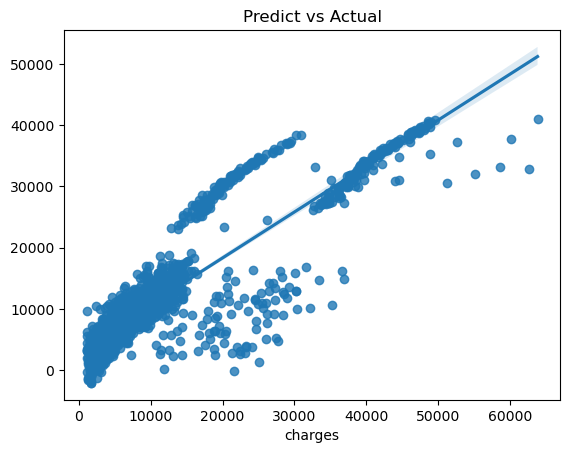

In [24]:
sns.regplot(x = depenendentValue, y = y_pred).set_title('Predict vs Actual')
plt.show()